In [1]:
import sys
import os
import platform
import numpy as np
import time
import torch
import torch.nn as nn
from torchvision import models
from torchvision import transforms
from PIL import Image
from pprint import pprint
import IPython.display

print('System info:', os.uname())
print('Python version:',sys.version)
print('torch version:', torch.__version__)

System info: posix.uname_result(sysname='Linux', nodename='raspberrypi', release='5.10.17+', version='#1421 Thu May 27 13:58:02 BST 2021', machine='armv6l')
Python version: 3.7.3 (default, Jan 22 2021, 20:04:44) 
[GCC 8.3.0]
torch version: 1.1.0


In [2]:
def get_squeezenet(freeze_features=False, out_features=2):
    model = models.squeezenet1_1(pretrained=False)
    classifier_list = list(model.classifier.children())
    num_channels = classifier_list[1].in_channels
    classifier_list[1] = nn.Conv2d(num_channels, out_features, kernel_size=(1,1), stride=(1,1))  
    if freeze_features:
        for param in model.features.parameters():
            param.requires_grad = False
    model.classifier = nn.Sequential(*classifier_list)
    return model

labels = ['person', 'robot']

def infer(img):
    img_t = transform(img)
    batch_t = torch.unsqueeze(img_t, 0)
    out = model(batch_t)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    _, indices = torch.sort(out, descending=True)
    return [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

In [3]:
model = get_squeezenet()
model.load_state_dict(torch.load('models/squeezenet_slim.pt'))
model.eval()


transform = transforms.Compose([            
 transforms.Resize(256),                    
 transforms.CenterCrop(224),                
 transforms.ToTensor(),                     
 transforms.Normalize(                      
 mean=[0.485, 0.456, 0.406],                
 std=[0.229, 0.224, 0.225]                  
 )])

Inference took: 2.219496011734009 seconds.


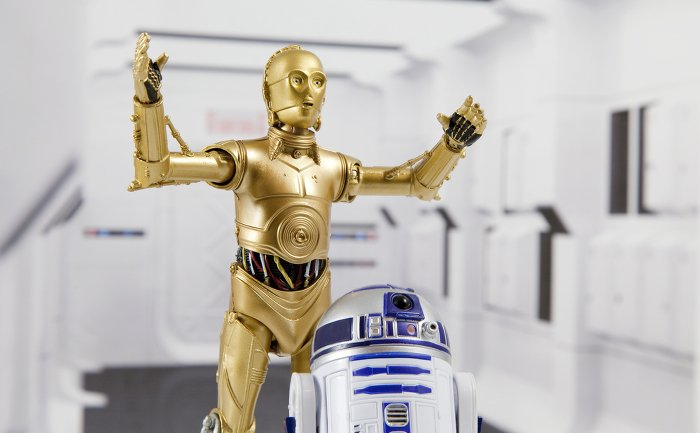

[('robot', 72.39860534667969), ('person', 27.601402282714844)]


In [4]:
image_path = 'bots.jpg'

img = Image.open(image_path)
start = time.time()
out = infer(img)
end = time.time()
print('Inference took:',end - start, 'seconds.')
img_vis = IPython.display.Image(filename=image_path)
display(img_vis)
pprint(out)

Inference took: 1.9901072978973389 seconds.


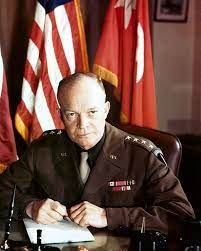

[('person', 71.39046478271484), ('robot', 28.609529495239258)]


In [5]:
image_path = 'person.jpg'

img = Image.open(image_path)
start = time.time()
out = infer(img)
end = time.time()
print('Inference took:',end - start, 'seconds.')
img_vis = IPython.display.Image(filename=image_path)
display(img_vis)
pprint(out)

Inference took: 1.9785284996032715 seconds.


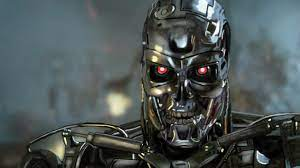

[('robot', 60.60391616821289), ('person', 39.39608383178711)]


In [6]:
image_path = 'bots2.jpg'

img = Image.open(image_path)
start = time.time()
out = infer(img)
end = time.time()
print('Inference took:',end - start, 'seconds.')
img_vis = IPython.display.Image(filename=image_path)
display(img_vis)
pprint(out)

Inference took: 1.9595646858215332 seconds.


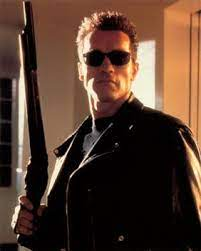

[('robot', 54.697113037109375), ('person', 45.302879333496094)]


In [7]:
image_path = 'person2.jpg'

img = Image.open(image_path)
start = time.time()
out = infer(img)
end = time.time()
print('Inference took:',end - start, 'seconds.')
img_vis = IPython.display.Image(filename=image_path)
display(img_vis)
pprint(out)